# Building the original model trained on Hurricane Ida data

### a) Importing necessary libraries

In [1]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error 
import pandas as pd
import numpy as np
import tensorflow as tf
import h5py
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import random as rn
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from bayes_opt import BayesianOptimization
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from keras.callbacks import EarlyStopping, ModelCheckpoint
import json
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import median_absolute_error
import pickle
import matplotlib.pyplot as plt
import shap
import warnings


# Ignore warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)

# Set random seeds for reproducibility
np.random.seed(1)
rn.seed(1)
tf.random.set_seed(1)


### b) Reading the hurricane Ida data

In [17]:
# Read the CSV file into a pandas DataFrame
df = pd.read_csv('Ida.csv', header=0)

df

,SiteNumber,SiteLongit,SiteLatitu,slo,wti,accumulati,Dis_Sea,Slope_degr,TWI,curv,...,Wind_MAX,Wind_Mean,Wind_Point,Rain_Point,Tide_Mean,Tide_Point,RiverDisMn,Mean_Gage_height,Slope-Invariability,Max_Gage_height
0,1398000,-74.827778,40.473333,2.96243,-4.41905,878333,0.556637,0.501344,18.316236,24145500,...,27.681339,27.253179,27.3923,0.008407,2.290778,2.13291,70214.25174,3.426463,1.215711,19.80
1,1397420,-74.742500,40.501944,4.51382,-4.38516,7613110,0.471549,0.208936,21.216994,52589500,...,28.046759,27.726087,27.9522,0.008362,1.965956,1.88838,48398.57261,6.689451,0.853690,27.10
2,1401000,-74.681944,40.333056,2.60898,-4.25152,1462430,0.437685,1.261950,17.966622,41312100,...,27.641634,26.371765,27.0814,0.008822,2.194427,1.98415,66321.35768,3.162708,1.067074,18.10
3,1401650,-74.648889,40.468056,2.38086,-4.03033,176373,0.378003,2.695280,15.115324,68069504,...,28.353420,28.180040,28.2679,0.011358,1.762609,1.69922,59838.32911,4.686875,1.313301,14.03
4,1401750,-74.617500,40.440000,2.07420,-3.99254,5610190,0.349136,14.066700,16.920150,119724000,...,30.554739,28.673716,28.4742,0.014453,1.715032,1.66287,54840.59032,5.366979,1.028678,23.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,1374505,-73.607472,41.394583,6.50866,-4.45221,2592720,0.370593,12.305600,16.286273,266675008,...,32.565933,31.566029,31.5753,1.533940,1.273931,1.28213,83549.62689,3.757292,1.159949,6.26
112,1374531,-73.639583,41.373389,6.49040,-4.43816,2924290,0.360568,1.420260,18.546203,269865984,...,32.565933,31.575161,31.9977,1.286300,1.274874,1.29693,82333.45368,2.472708,1.218155,7.65
113,1374781,-73.591472,41.327361,5.60845,-4.61122,552958,0.303099,5.531940,15.547339,259660000,...,31.731365,30.672288,31.7314,1.619680,1.247937,1.27567,80873.35558,2.266146,0.928704,4.77
114,1374559,-73.759583,41.470472,6.95186,-4.72131,369281,0.481995,14.157900,14.192663,332233984,...,30.709866,30.188942,30.7331,0.494721,1.341517,1.33736,83404.89377,1.503437,1.042718,4.27


### c) Renaming columns and adding new features that consider interactions between existing features, identified through the forward feature selection method.

In [3]:
df["Altitude:Tide_Mean"] = df["Altitude"] * df["Tide_Mean"]
df["Altitude:Rain_Point"] = df["Altitude"] * df["Rain_Point"]
df["Tide_Mean:TWI"] = df["Tide_Mean"] * df["TWI"]
df["Tide_Mean:Wind_MAX"] = df["Tide_Mean"] * df["Wind_MAX"]
df["Tide_Mean:Rain_Point"] = df["Tide_Mean"] * df["Rain_Point"]
df["Mean_Gage_height:Rain_Point"] = df["Mean_Gage_height"] * df["Rain_Point"]
df["Tide_Mean:Soil_Point"] = df["Tide_Mean"] * df["Soil_Point"]
df["Altitude:Soil_Point"] = df["Altitude"] * df["Soil_Point"]
df["Mean_Gage_height:Soil_Point"] = df["Mean_Gage_height"] * df["Soil_Point"]
df["Mean_Gage_height:Tide_Mean"] = df["Mean_Gage_height"] * df["Tide_Mean"]
df["Altitude:Wind_MAX"] = df["Altitude"] * df["Wind_MAX"]
df["Mean_Gage_height:Wind_MAX"] = df["Mean_Gage_height"] * df["Wind_MAX"]
df["Mean_Gage_height:TWI"] = df["Mean_Gage_height"] * df["TWI"]



new_column_names = {
     "Mean_Gage_height": "Antecedent water depth",
     "Altitude": "Elevation",
     "Tide_Mean": "Storm surge\nWatershed average",
     "Rain_Point":"Rain\nPoint-based",
     "TWI":'TWI\nPoint-based',
     "Soil_Point":'Soil\nPoint-based',
     "Wind_MAX":'Wind\nWatershed maximum',
     "Dis_storm":'Distance from storm track',
     "Altitude:Tide_Mean":'Elevation * Storm surge',
     "Altitude:Rain_Point": 'Elevation * Rain',
     "Tide_Mean:TWI": "Storm surge * TWI",
     "Tide_Mean:Wind_MAX":"Storm surge * Wind",
     "Tide_Mean:Rain_Point":"Storm surge * Rain",
     "Mean_Gage_height:Rain_Point":"Antecedent water depth * Rain",
     "Tide_Mean:Soil_Point":"Storm surge * Soil",
     "Altitude:Soil_Point": "Elevation * Soil",
     "Mean_Gage_height:Soil_Point":"Antecedent water depth * Soil",
     "Mean_Gage_height:Tide_Mean": "Antecedent water depth * Storm surge",
     "Altitude:Wind_MAX": "Elevation * Wind",
     "Mean_Gage_height:Wind_MAX": "Antecedent water depth * Wind",
     "Mean_Gage_height:TWI": "Antecedent water depth * TWI"
}

# Renaming the columns
df.rename(columns=new_column_names, inplace=True)


features = [
    "Antecedent water depth",
     "Elevation",
     "Storm surge\nWatershed average",
     "Rain\nPoint-based",
     'TWI\nPoint-based',
     'Soil\nPoint-based',
     'Wind\nWatershed maximum',
     'Distance from storm track',
     'Elevation * Storm surge',
     'Elevation * Rain',
     "Storm surge * TWI",
     "Storm surge * Wind",
     "Storm surge * Rain",
     "Antecedent water depth * Rain",
     "Storm surge * Soil",
     "Elevation * Soil",
     "Antecedent water depth * Soil",
     "Antecedent water depth * Storm surge",
     "Elevation * Wind",
     "Antecedent water depth * Wind",
     "Antecedent water depth * TWI"
]

#'Max_Gage_height'
y = df['Max_Gage_height']* 0.3048 
x = df[features]
x.shape

(116, 21)

### d) Spliting and Scaling data

In [4]:
# Split data into training and testing sets
Xtrain, Xtest, Ytrain, Ytest = train_test_split(x.values, y.values, test_size=0.1, random_state=64)


# Standardize the numerical features
scaler = StandardScaler()
Xtrain_scaled = scaler.fit_transform(Xtrain)
Xtest_scaled = scaler.fit_transform(Xtest)

### e) Using Bayesian Optimization with cross-validation to identify optimized hyperparameters.

In [40]:
# Define optimizer and activation options in the global scope
optimizer_options = ['sgd', 'adam']
activation_options = ['elu', 'relu']

# Define the function to create the Keras model
def create_model(num_layers, num_units, regularization_rate, optimizer, activations):
    # Assuming 'features' is defined globally or this part of the code is adjusted to include it
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.InputLayer(input_shape=(len(features),)))
    
    # Dynamically add layers
    for _ in range(int(num_layers)):
        model.add(tf.keras.layers.Dense(int(num_units), activation=activations,
                                        kernel_initializer=tf.keras.initializers.he_normal(seed=1),
                                        bias_initializer='zeros',
                                        kernel_regularizer=tf.keras.regularizers.l2(regularization_rate)))

    model.add(tf.keras.layers.Dense(1, kernel_initializer='he_normal', bias_initializer='zeros'))
    
    model.compile(optimizer=optimizer,
                  loss='mean_absolute_error',
                  metrics=['mean_absolute_error'])
    
    return model

# Correct the batch_size calculation in crossval_model
def crossval_model(num_layers, num_units, regularization_rate, optimizer_index, activations_index, batch_size, epochs):
    num_layers= int(round(num_layers))
    num_units = int(round(num_units))
    optimizer = optimizer_options[int(optimizer_index)]
    activations = activation_options[int(activations_index)]
    batch_size = int(2 ** (round(batch_size)))  
    epochs = int(round(epochs))
    
    model = KerasRegressor(build_fn=lambda: create_model(num_layers=num_layers,
                                                         num_units=num_units,
                                                         regularization_rate=regularization_rate,
                                                         optimizer=optimizer,
                                                         activations=activations),
                           epochs=epochs,  
                           batch_size=batch_size,
                           verbose=0)
    
    scores = cross_val_score(model, Xtrain_scaled, Ytrain, cv=5, scoring='neg_mean_absolute_error')
    
    return np.mean(scores)


# Adjusted bounds for Bayesian optimization
pbounds = {
    'num_layers': (1, 3),
    'num_units': (10, 90),
    'regularization_rate': (0.01, 0.2),
    'optimizer_index': (0, len(optimizer_options) - 1),
    'activations_index': (0, len(activation_options) - 1),
    'batch_size': (2, 4),
    'epochs': (100, 1000),
}

optimizer = BayesianOptimization(f=crossval_model, pbounds=pbounds, random_state=64)
optimizer.maximize(init_points=2, n_iter=3)

best_hyperparameters = optimizer.max['params']
best_hyperparameters['num_layers']= int(round(best_hyperparameters['num_layers']))
best_hyperparameters['num_units']= int(round(best_hyperparameters['num_units']))
best_hyperparameters['optimizer'] = optimizer_options[int(best_hyperparameters['optimizer_index'])]
best_hyperparameters['activations'] = activation_options[int(best_hyperparameters['activations_index'])]
best_hyperparameters['batch_size'] = int(2 ** (round(best_hyperparameters['batch_size'])))
best_hyperparameters['epochs']= int(round(best_hyperparameters['epochs']))

# Create and train the model with the best hyperparameters
best_model = create_model(
    num_layers= best_hyperparameters['num_layers'],
    num_units= best_hyperparameters['num_units'],
    regularization_rate= best_hyperparameters['regularization_rate'],
    optimizer= best_hyperparameters['optimizer'],
    activations= best_hyperparameters['activations'],
)

#print the best hyperparameters
print (best_hyperparameters)

|   iter    |  target   | activa... | batch_... |  epochs   | num_la... | num_units | optimi... | regula... |
-------------------------------------------------------------------------------------------------------------
| 1         | -0.7853   | 0.3791    | 3.134     | 636.0     | 1.45      | 46.56     | 0.3117    | 0.06953   |
| 2         | -0.7975   | 0.2949    | 3.062     | 456.6     | 1.719     | 53.85     | 0.5821    | 0.04185   |
| 3         | -0.8673   | 0.7977    | 3.526     | 636.3     | 1.289     | 45.8      | 0.7333    | 0.1474    |
| 4         | -0.8756   | 0.5392    | 2.538     | 545.6     | 1.611     | 52.48     | 0.1135    | 0.0301    |
| 5         | -0.8293   | 0.8926    | 2.499     | 372.5     | 1.636     | 25.87     | 0.1715    | 0.01764   |
{'activations_index': 0.3790985254337701, 'batch_size': 8, 'epochs': 636, 'num_layers': 1, 'num_units': 47, 'optimizer_index': 0.3116509978753955, 'regularization_rate': 0.06953409862753837, 'optimizer': 'sgd', 'activations': 'elu

### f) Building the best model based on hyperparameters derived from the Bayesian search method, with slight adjustments to the number of units and the regularization rate.

In [5]:
# Define the best hyperparameters
best_hyperparameters = {
    'units': 50,
    'regularization_rate': 0.10404983,
    'optimizer': 'sgd',
    'num_layers': 1,
    'epochs': 636,
    'batch_size': 8,
    'activations': 'elu'
}


# Define a custom callback function
class CustomEarlyStopping(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if logs['val_loss'] < 1 and logs['loss']< 1:
            self.model.stop_training = True

# Create an instance of the custom callback
custom_early_stopping = CustomEarlyStopping()

# Define model checkpointing
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)

# Train the model and generate the training history
history = best_model.fit(Xtrain_scaled, Ytrain, validation_data=(Xtest_scaled, Ytest), batch_size=best_hyperparameters['batch_size'], epochs=best_hyperparameters['epochs'], callbacks=[custom_early_stopping, model_checkpoint])


Epoch 1/636
13/13 [==============================] - 1s 32ms/step - loss: 13.7589 - mean_absolute_error: 3.8136 - val_loss: 12.8897 - val_mean_absolute_error: 3.2363
Epoch 2/636
13/13 [==============================] - 0s 5ms/step - loss: 12.5899 - mean_absolute_error: 3.1717 - val_loss: 11.8534 - val_mean_absolute_error: 2.7032
Epoch 3/636
13/13 [==============================] - 0s 5ms/step - loss: 11.5470 - mean_absolute_error: 2.6146 - val_loss: 10.8029 - val_mean_absolute_error: 2.1175
Epoch 4/636
13/13 [==============================] - 0s 6ms/step - loss: 10.5733 - mean_absolute_error: 2.0913 - val_loss: 9.8532 - val_mean_absolute_error: 1.6015
Epoch 5/636
13/13 [==============================] - 0s 7ms/step - loss: 9.7388 - mean_absolute_error: 1.6765 - val_loss: 9.0404 - val_mean_absolute_error: 1.1950
Epoch 6/636
13/13 [==============================] - 0s 6ms/step - loss: 9.0142 - mean_absolute_error: 1.3478 - val_loss: 8.4241 - val_mean_absolute_error: 0.9641
Epoch 7/636
13

Epoch 51/636
13/13 [==============================] - 0s 5ms/step - loss: 1.4362 - mean_absolute_error: 0.6479 - val_loss: 1.6645 - val_mean_absolute_error: 0.8997
Epoch 52/636
13/13 [==============================] - 0s 4ms/step - loss: 1.4074 - mean_absolute_error: 0.6539 - val_loss: 1.7033 - val_mean_absolute_error: 0.9674
Epoch 53/636
13/13 [==============================] - 0s 5ms/step - loss: 1.3810 - mean_absolute_error: 0.6558 - val_loss: 1.4882 - val_mean_absolute_error: 0.7811
Epoch 54/636
13/13 [==============================] - 0s 4ms/step - loss: 1.3365 - mean_absolute_error: 0.6370 - val_loss: 1.6193 - val_mean_absolute_error: 0.9378
Epoch 55/636
13/13 [==============================] - 0s 4ms/step - loss: 1.2985 - mean_absolute_error: 0.6307 - val_loss: 1.5814 - val_mean_absolute_error: 0.9226
Epoch 56/636
13/13 [==============================] - 0s 5ms/step - loss: 1.2768 - mean_absolute_error: 0.6356 - val_loss: 1.3843 - val_mean_absolute_error: 0.7686
Epoch 57/636
13/

### g) Evaluating model performance on both the training and test data.

In [6]:
# Evaluate the model on the test set
Ytrain_pred = best_model.predict(Xtrain_scaled)
Ytest_pred = best_model.predict(Xtest_scaled)

print("R-squared for train: {:.2f}".format(r2_score(Ytrain, Ytrain_pred)))
print("R-squared for test: {:.2f}".format(r2_score(Ytest, Ytest_pred)))
print("MAE for train: {:.2f}".format(metrics.mean_absolute_error(Ytrain, Ytrain_pred)))
print("MAE for test: {:.2f}".format(metrics.mean_absolute_error(Ytest, Ytest_pred)))
print("Median Absolute Error for train: {:.2f}".format(median_absolute_error(Ytrain, Ytrain_pred)))
print("Median Absolute Error for test: {:.2f}".format(median_absolute_error(Ytest, Ytest_pred)))
print("Root mean square Error for train: {:.2f}".format(np.sqrt(mean_squared_error(Ytrain, Ytrain_pred))))
print("Root mean square Error for test: {:.2f}".format(np.sqrt(mean_squared_error(Ytest, Ytest_pred))))
print("BIAS for train: {:.2f}".format(np.mean(Ytrain_pred - Ytrain)))
print("BIAS for test: {:.2f}".format(np.mean(Ytest_pred - Ytest)))
print("Ratio of Prediction over Observation for train: {:.2f}".format(np.mean(Ytrain_pred / Ytrain)))
print("Ratio of Prediction over Observation for test: {:.2f}".format(np.mean(Ytest_pred / Ytest)))
print("Normalized Root Mean Square Error for train: {:.2f}".format(np.sqrt(mean_squared_error(Ytrain, Ytrain_pred)) / (np.mean(Ytrain))))
print("Normalized Root Mean Square Error for test: {:.2f}".format(np.sqrt(mean_squared_error(Ytest, Ytest_pred)) / (np.mean(Ytest))))


1/1 [==============================] - 0s 24ms/step
R-squared for train: 0.94
R-squared for test: 0.91
MAE for train: 0.64
MAE for test: 0.77
Median Absolute Error for train: 0.44
Median Absolute Error for test: 0.42
Root mean square Error for train: 0.91
Root mean square Error for test: 0.97
BIAS for train: -0.13
BIAS for test: 0.19
Ratio of Prediction over Observation for train: 1.35
Ratio of Prediction over Observation for test: 1.71
Normalized Root Mean Square Error for train: 0.24
Normalized Root Mean Square Error for test: 0.28


### h) Plotting the training history.

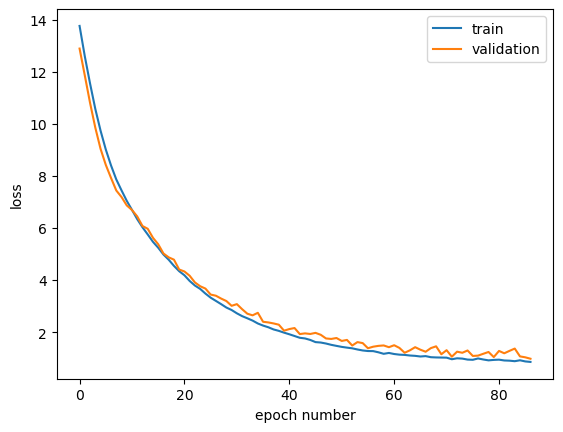

In [7]:
# Access the training history
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

# plot training history
plt.plot(training_loss, label='train')
plt.plot(validation_loss, label='validation')
plt.xlabel('epoch number')
plt.ylabel('loss')
plt.legend()
plt.show()

### i) Plotting scatter plots of the training and test data.

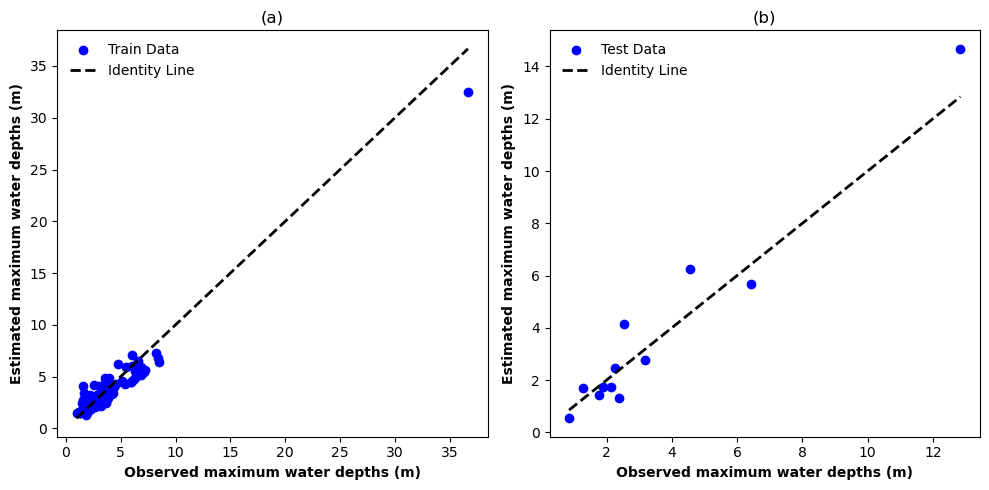

In [13]:
# Create a figure with two subplots side by side
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# Scatter plot for simulated vs observed max flood depths (Train Data)
axes[0].scatter(Ytrain, Ytrain_pred, color='blue', label='Train Data')
axes[0].plot([Ytrain.min(), Ytrain.max()], [Ytrain.min(), Ytrain.max()], 'k--', lw=2, label='Identity Line')
axes[0].set_xlabel('Observed maximum water depths (m)', fontweight='bold')
axes[0].set_ylabel('Estimated maximum water depths (m)', fontweight='bold')
axes[0].set_title('(a)')
axes[0].legend(frameon=False)  # No legend box

# Scatter plot for simulated vs observed max flood depths (Test Data)
axes[1].scatter(Ytest, Ytest_pred, color='blue', label='Test Data')
axes[1].plot([Ytest.min(), Ytest.max()], [Ytest.min(), Ytest.max()], 'k--', lw=2, label='Identity Line')
axes[1].set_xlabel('Observed maximum water depths (m)', fontweight='bold')
axes[1].set_ylabel('Estimated maximum water depths (m)', fontweight='bold')
axes[1].set_title('(b)')
axes[1].legend(frameon=False)  # No legend box

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

### j) Creating the SHAP (SHapley Additive exPlanations) model.

In [87]:
# Set the feature names
features2 = x.columns

# Define a function to wrap the Keras model for compatibility with SHAP
def keras_model_wrapper(x):
    return best_model.predict(x).flatten()

# Create an explainer object for the best model
explainer = shap.KernelExplainer(keras_model_wrapper, Xtrain_scaled)

# Compute SHAP values for the test set
shap_values = explainer.shap_values(Xtrain_scaled)


4/4 [==============================] - 0s 7ms/step


Using 104 background data samples could cause slower run times. Consider using shap.kmeans(data, K) to summarize the background as K weighted samples.


4/4 [==============================] - 0s 3ms/step


  0%|          | 0/104 [00:00<?, ?it/s]

6793/6793 [==============================] - 6s 894us/step


  1%|          | 1/104 [00:11<20:02, 11.68s/it]

6793/6793 [==============================] - 6s 913us/step


  2%|▏         | 2/104 [00:21<17:53, 10.52s/it]

6793/6793 [==============================] - 6s 896us/step


  3%|▎         | 3/104 [00:33<18:36, 11.06s/it]

6793/6793 [==============================] - 6s 921us/step


  4%|▍         | 4/104 [00:44<18:53, 11.34s/it]

6793/6793 [==============================] - 6s 931us/step


  5%|▍         | 5/104 [00:56<18:53, 11.45s/it]

6793/6793 [==============================] - 6s 952us/step


  6%|▌         | 6/104 [01:06<17:55, 10.97s/it]

6793/6793 [==============================] - 6s 938us/step


  7%|▋         | 7/104 [01:16<17:05, 10.57s/it]

6793/6793 [==============================] - 7s 982us/step


  8%|▊         | 8/104 [01:27<17:28, 10.92s/it]

6793/6793 [==============================] - 6s 906us/step


  9%|▊         | 9/104 [01:39<17:43, 11.19s/it]

6793/6793 [==============================] - 6s 875us/step


 10%|▉         | 10/104 [01:49<16:35, 10.59s/it]

6793/6793 [==============================] - 6s 896us/step


 11%|█         | 11/104 [02:00<16:55, 10.92s/it]

6793/6793 [==============================] - 6s 924us/step


 12%|█▏        | 12/104 [02:10<16:10, 10.55s/it]

6793/6793 [==============================] - 6s 903us/step


 12%|█▎        | 13/104 [02:19<15:32, 10.25s/it]

6793/6793 [==============================] - 6s 899us/step


 13%|█▎        | 14/104 [02:29<14:59,  9.99s/it]

6793/6793 [==============================] - 6s 883us/step


 14%|█▍        | 15/104 [02:38<14:30,  9.78s/it]

6793/6793 [==============================] - 6s 888us/step


 15%|█▌        | 16/104 [02:48<14:12,  9.69s/it]

6793/6793 [==============================] - 7s 958us/step


 16%|█▋        | 17/104 [02:58<14:13,  9.81s/it]

6793/6793 [==============================] - 7s 1ms/step


 17%|█▋        | 18/104 [03:10<14:59, 10.46s/it]

6793/6793 [==============================] - 7s 1ms/step


 18%|█▊        | 19/104 [03:21<15:04, 10.64s/it]

6793/6793 [==============================] - 7s 1ms/step


 19%|█▉        | 20/104 [03:31<14:54, 10.65s/it]

6793/6793 [==============================] - 7s 996us/step


 20%|██        | 21/104 [03:42<14:40, 10.61s/it]

6793/6793 [==============================] - 7s 992us/step


 21%|██        | 22/104 [03:54<14:58, 10.96s/it]

6793/6793 [==============================] - 6s 919us/step


 22%|██▏       | 23/104 [04:05<15:07, 11.20s/it]

6793/6793 [==============================] - 6s 902us/step


 23%|██▎       | 24/104 [04:15<14:19, 10.74s/it]

6793/6793 [==============================] - 6s 904us/step


 24%|██▍       | 25/104 [04:27<14:31, 11.04s/it]

6793/6793 [==============================] - 6s 906us/step


 25%|██▌       | 26/104 [04:36<13:43, 10.56s/it]

6793/6793 [==============================] - 6s 888us/step


 26%|██▌       | 27/104 [04:46<13:03, 10.17s/it]

6793/6793 [==============================] - 6s 885us/step


 27%|██▋       | 28/104 [04:55<12:34,  9.93s/it]

6793/6793 [==============================] - 6s 901us/step


 28%|██▊       | 29/104 [05:04<12:14,  9.79s/it]

6793/6793 [==============================] - 6s 910us/step


 29%|██▉       | 30/104 [05:16<12:46, 10.35s/it]

6793/6793 [==============================] - 6s 892us/step


 30%|██▉       | 31/104 [05:28<13:04, 10.75s/it]

6793/6793 [==============================] - 6s 891us/step


 31%|███       | 32/104 [05:37<12:23, 10.32s/it]

6793/6793 [==============================] - 6s 896us/step


 32%|███▏      | 33/104 [05:46<11:53, 10.05s/it]

6793/6793 [==============================] - 6s 897us/step


 33%|███▎      | 34/104 [05:58<12:18, 10.55s/it]

6793/6793 [==============================] - 6s 866us/step


 34%|███▎      | 35/104 [06:07<11:41, 10.16s/it]

6793/6793 [==============================] - 6s 887us/step


 35%|███▍      | 36/104 [06:17<11:14,  9.92s/it]

6793/6793 [==============================] - 6s 893us/step


 36%|███▌      | 37/104 [06:26<10:55,  9.78s/it]

6793/6793 [==============================] - 7s 974us/step


 37%|███▋      | 38/104 [06:38<11:23, 10.36s/it]

6793/6793 [==============================] - 6s 881us/step


 38%|███▊      | 39/104 [06:50<11:40, 10.77s/it]

6793/6793 [==============================] - 7s 967us/step


 38%|███▊      | 40/104 [07:01<11:47, 11.06s/it]

6793/6793 [==============================] - 7s 1ms/step


 39%|███▉      | 41/104 [07:12<11:26, 10.89s/it]

6793/6793 [==============================] - 6s 881us/step


 40%|████      | 42/104 [07:24<11:29, 11.12s/it]

6793/6793 [==============================] - 6s 893us/step


 41%|████▏     | 43/104 [07:35<11:28, 11.28s/it]

6793/6793 [==============================] - 6s 889us/step


 42%|████▏     | 44/104 [07:47<11:24, 11.41s/it]

6793/6793 [==============================] - 6s 902us/step


 43%|████▎     | 45/104 [07:59<11:18, 11.51s/it]

6793/6793 [==============================] - 6s 887us/step


 44%|████▍     | 46/104 [08:10<11:09, 11.55s/it]

6793/6793 [==============================] - 6s 888us/step


 45%|████▌     | 47/104 [08:22<11:01, 11.60s/it]

6793/6793 [==============================] - 6s 881us/step


 46%|████▌     | 48/104 [08:34<10:50, 11.62s/it]

6793/6793 [==============================] - 6s 894us/step


 47%|████▋     | 49/104 [08:43<10:04, 10.98s/it]

6793/6793 [==============================] - 6s 881us/step


 48%|████▊     | 50/104 [08:52<09:25, 10.48s/it]

6793/6793 [==============================] - 6s 903us/step


 49%|████▉     | 51/104 [09:02<08:56, 10.12s/it]

6793/6793 [==============================] - 6s 887us/step


 50%|█████     | 52/104 [09:11<08:39,  9.99s/it]

6793/6793 [==============================] - 6s 883us/step


 51%|█████     | 53/104 [09:23<08:55, 10.49s/it]

6793/6793 [==============================] - 6s 893us/step


 52%|█████▏    | 54/104 [09:33<08:28, 10.16s/it]

6793/6793 [==============================] - 6s 888us/step


 53%|█████▎    | 55/104 [09:44<08:40, 10.62s/it]

6793/6793 [==============================] - 6s 886us/step


 54%|█████▍    | 56/104 [09:56<08:47, 10.99s/it]

6793/6793 [==============================] - 6s 927us/step


 55%|█████▍    | 57/104 [10:06<08:17, 10.58s/it]

6793/6793 [==============================] - 6s 899us/step


 56%|█████▌    | 58/104 [10:15<07:51, 10.24s/it]

6793/6793 [==============================] - 6s 874us/step


 57%|█████▋    | 59/104 [10:27<07:59, 10.66s/it]

6793/6793 [==============================] - 6s 875us/step


 58%|█████▊    | 60/104 [10:38<08:02, 10.98s/it]

6793/6793 [==============================] - 6s 878us/step


 59%|█████▊    | 61/104 [10:48<07:29, 10.45s/it]

6793/6793 [==============================] - 6s 876us/step


 60%|█████▉    | 62/104 [10:57<07:03, 10.09s/it]

6793/6793 [==============================] - 6s 902us/step


 61%|██████    | 63/104 [11:06<06:44,  9.86s/it]

6793/6793 [==============================] - 6s 894us/step


 62%|██████▏   | 64/104 [11:16<06:27,  9.68s/it]

6793/6793 [==============================] - 6s 855us/step


 62%|██████▎   | 65/104 [11:25<06:09,  9.48s/it]

6793/6793 [==============================] - 6s 877us/step


 63%|██████▎   | 66/104 [11:34<05:59,  9.45s/it]

6793/6793 [==============================] - 6s 867us/step


 64%|██████▍   | 67/104 [11:46<06:14, 10.13s/it]

6793/6793 [==============================] - 6s 846us/step


 65%|██████▌   | 68/104 [11:55<05:51,  9.77s/it]

6793/6793 [==============================] - 6s 886us/step


 66%|██████▋   | 69/104 [12:04<05:36,  9.62s/it]

6793/6793 [==============================] - 6s 888us/step


 67%|██████▋   | 70/104 [12:13<05:26,  9.60s/it]

6793/6793 [==============================] - 6s 872us/step


 68%|██████▊   | 71/104 [12:23<05:12,  9.48s/it]

6793/6793 [==============================] - 6s 874us/step


 69%|██████▉   | 72/104 [12:32<04:59,  9.37s/it]

6793/6793 [==============================] - 6s 887us/step


 70%|███████   | 73/104 [12:43<05:12, 10.08s/it]

6793/6793 [==============================] - 6s 908us/step


 71%|███████   | 74/104 [12:53<04:59,  9.99s/it]

6793/6793 [==============================] - 6s 867us/step


 72%|███████▏  | 75/104 [13:05<05:04, 10.50s/it]

6793/6793 [==============================] - 6s 872us/step


 73%|███████▎  | 76/104 [13:14<04:43, 10.13s/it]

6793/6793 [==============================] - 6s 881us/step


 74%|███████▍  | 77/104 [13:26<04:46, 10.60s/it]

6793/6793 [==============================] - 6s 872us/step


 75%|███████▌  | 78/104 [13:38<04:43, 10.91s/it]

6793/6793 [==============================] - 6s 879us/step


 76%|███████▌  | 79/104 [13:47<04:19, 10.39s/it]

6793/6793 [==============================] - 6s 874us/step


 77%|███████▋  | 80/104 [13:56<04:00, 10.04s/it]

6793/6793 [==============================] - 6s 940us/step


 78%|███████▊  | 81/104 [14:06<03:52, 10.12s/it]

6793/6793 [==============================] - 6s 908us/step


 79%|███████▉  | 82/104 [14:16<03:39,  9.97s/it]

6793/6793 [==============================] - 6s 877us/step


 80%|███████▉  | 83/104 [14:27<03:39, 10.47s/it]

6793/6793 [==============================] - 6s 851us/step


 81%|████████  | 84/104 [14:36<03:20, 10.00s/it]

6793/6793 [==============================] - 6s 869us/step


 82%|████████▏ | 85/104 [14:48<03:19, 10.49s/it]

6793/6793 [==============================] - 6s 876us/step


 83%|████████▎ | 86/104 [14:57<03:01, 10.10s/it]

6793/6793 [==============================] - 6s 874us/step


 84%|████████▎ | 87/104 [15:09<03:00, 10.59s/it]

6793/6793 [==============================] - 6s 872us/step


 85%|████████▍ | 88/104 [15:21<02:54, 10.91s/it]

6793/6793 [==============================] - 6s 890us/step


 86%|████████▌ | 89/104 [15:30<02:36, 10.46s/it]

6793/6793 [==============================] - 6s 851us/step


 87%|████████▋ | 90/104 [15:42<02:31, 10.82s/it]

6793/6793 [==============================] - 6s 860us/step


 88%|████████▊ | 91/104 [15:51<02:14, 10.32s/it]

6793/6793 [==============================] - 6s 879us/step


 88%|████████▊ | 92/104 [16:00<02:00, 10.01s/it]

6793/6793 [==============================] - 6s 850us/step


 89%|████████▉ | 93/104 [16:09<01:47,  9.74s/it]

6793/6793 [==============================] - 6s 883us/step


 90%|█████████ | 94/104 [16:21<01:43, 10.32s/it]

6793/6793 [==============================] - 6s 850us/step


 91%|█████████▏| 95/104 [16:33<01:36, 10.72s/it]

6793/6793 [==============================] - 6s 855us/step


 92%|█████████▏| 96/104 [16:42<01:21, 10.22s/it]

6793/6793 [==============================] - 6s 869us/step


 93%|█████████▎| 97/104 [16:51<01:09, 10.00s/it]

6793/6793 [==============================] - 6s 853us/step


 94%|█████████▍| 98/104 [17:03<01:03, 10.51s/it]

6793/6793 [==============================] - 6s 875us/step


 95%|█████████▌| 99/104 [17:12<00:50, 10.14s/it]

6793/6793 [==============================] - 6s 879us/step


 96%|█████████▌| 100/104 [17:21<00:39,  9.88s/it]

6793/6793 [==============================] - 6s 848us/step


 97%|█████████▋| 101/104 [17:33<00:31, 10.42s/it]

6793/6793 [==============================] - 6s 892us/step


 98%|█████████▊| 102/104 [17:45<00:21, 10.79s/it]

6793/6793 [==============================] - 6s 867us/step


 99%|█████████▉| 103/104 [17:54<00:10, 10.29s/it]

6793/6793 [==============================] - 6s 865us/step


100%|██████████| 104/104 [18:05<00:00, 10.44s/it]


### k) Plotting the radar plot for the SHAP model.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


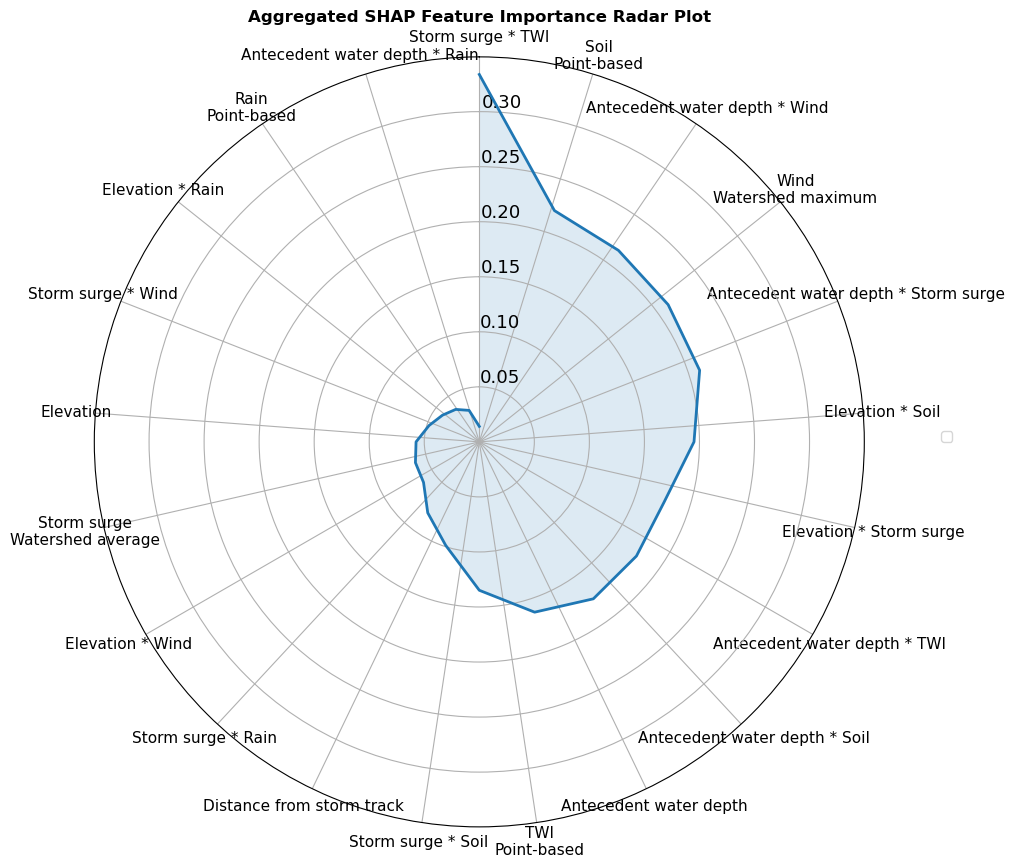

In [119]:
pi = np.pi

# Get mean absolute SHAP values across all instances
importances = np.abs(shap_values).mean(axis=0) 

# Sort features based on aggregated importance
sorted_indices = np.argsort(importances)[::-1]
sorted_importances = importances[sorted_indices]
sorted_features = np.array(features)[sorted_indices]

# Number of variables (features)
n_vars = len(sorted_features)

# Radius / offset for labels
label_radius = 1.2 * max(sorted_importances)

# Init radar plot
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)

# Draw one axe per variable + add labels
tick_positions = np.arange(0, 2*pi, 2*pi/n_vars)
plt.xticks(tick_positions, sorted_features, fontsize=11
           #, fontweight='bold'
          )


# Increase font size of radial axis tick labels
ax.tick_params(axis='y', labelsize=13)

ax.set_rlabel_position(label_radius)

# Plot data
ax.plot(np.linspace(0, 2*pi, n_vars), sorted_importances, linewidth=2, linestyle='-')
ax.fill(np.linspace(0, 2*pi, n_vars), sorted_importances, alpha=0.15)

# Add legend / title / grid
plt.legend(loc=(1.1, 0.5))
plt.title("Aggregated SHAP Feature Importance Radar Plot", fontweight='bold')
ax.grid(True)

plt.show()

### l) Plotting the SHAP summary BAR plot

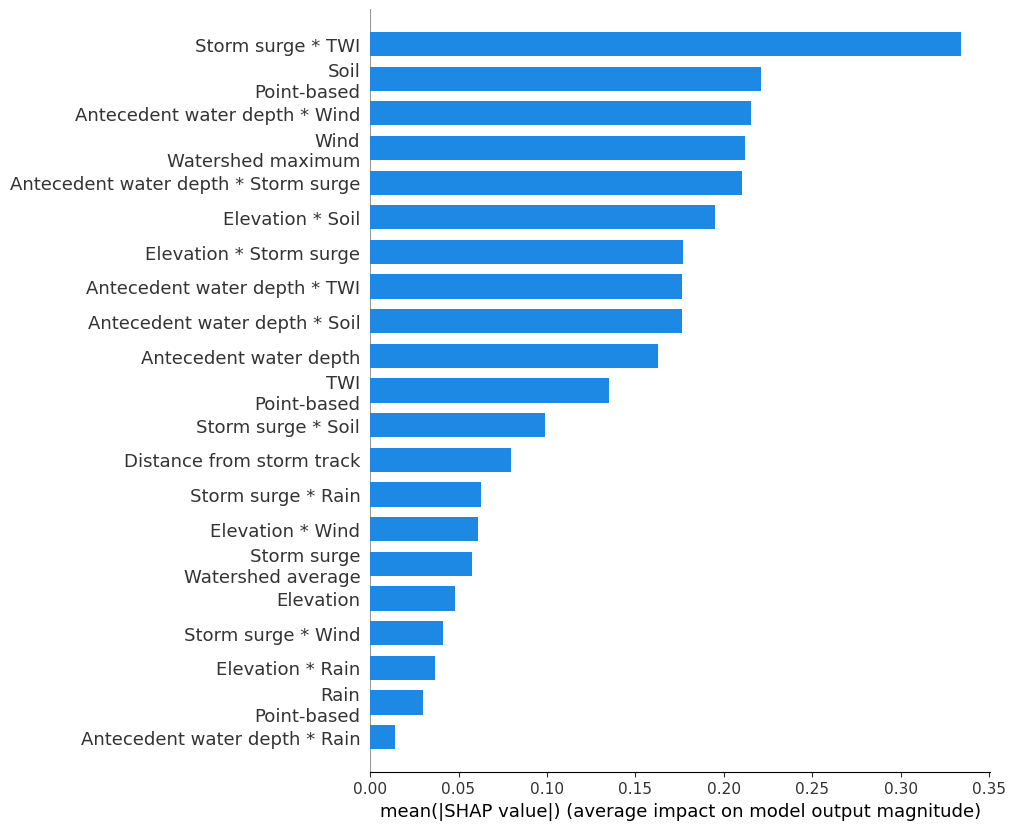

In [120]:
# Generate the SHAP summary BAR plot
shap.summary_plot(shap_values, Xtest_scaled, feature_names=features2[:], plot_type='bar', max_display=30)

### m) Evaluating model performance on the entire dataset from Hurricane Ida.

In [14]:
# Read the CSV file into a pandas DataFrame
x_Ida = df[features].copy()

y_Ida = df['Max_Gage_height']* 0.3048

# Scale the data
scaler = StandardScaler()
x_Ida_scaled = scaler.fit_transform(x_Ida)

# Evaluate the model on the test set
y_Ida_pred = best_model.predict(x_Ida_scaled)

print("R-squared for Ida: {:.2f}".format(np.round(r2_score(y_Ida, y_Ida_pred), 2)))
print("MAE for Idat: {:.2f}".format(metrics.mean_absolute_error(y_Ida, y_Ida_pred)))
print("Median Absolute Error for Ida: {:.2f}".format(median_absolute_error(y_Ida, y_Ida_pred)))
print("Root mean square error for new dataset: {}". format(np.round(np.sqrt(mean_squared_error(y_Ida, y_Ida_pred)), 2)))
print("BIAS for Ida: {:.2f}".format(np.mean(y_Ida_pred - y_Ida.values.flatten())))
print("Normalized Root Mean Square Error for Ida (%): {:.2f}".format(np.sqrt(mean_squared_error( y_Ida, y_Ida_pred))*100 / ( np.mean(y_Ida) )))
print("Ratio of Prediction over Observation for Ida (%): {:.2f}".format(np.mean(y_Ida_pred / y_Ida.values.flatten())*100))


4/4 [==============================] - 0s 5ms/step
R-squared for Ida: 0.94
MAE for Idat: 0.64
Median Absolute Error for Ida: 0.45
Root mean square error for new dataset: 0.89
BIAS for Ida: -0.10
Normalized Root Mean Square Error for Ida (%): 24.08
Ratio of Prediction over Observation for Ida (%): 138.08


# Evaluating the original model on data from other three hurricanes without retraining

## 1. Hurricane Sandy

In [8]:
# Read the CSV file into a pandas DataFrame
Sandy = pd.read_csv('Sandy.csv', header=0)


Sandy["Altitude:Tide_Mean"] = Sandy["Altitude"] * Sandy["Tide_Mean"]
Sandy["Altitude:Rain_Point"] = Sandy["Altitude"] * Sandy["Rain_Point"]
Sandy["Tide_Mean:TWI"] = Sandy["Tide_Mean"] * Sandy["TWI"]
Sandy["Tide_Mean:Wind_MAX"] = Sandy["Tide_Mean"] * Sandy["Wind_MAX"]
Sandy["Tide_Mean:Rain_Point"] = Sandy["Tide_Mean"] * Sandy["Rain_Point"]
Sandy["Mean_Gage_height:Rain_Point"] = Sandy["Mean_Gage_height"] * Sandy["Rain_Point"]
Sandy["Tide_Mean:Soil_Point"] = Sandy["Tide_Mean"] * Sandy["Soil_Point"]
Sandy["Altitude:Soil_Point"] = Sandy["Altitude"] * Sandy["Soil_Point"]
Sandy["Mean_Gage_height:Soil_Point"] = Sandy["Mean_Gage_height"] * Sandy["Soil_Point"]
Sandy["Mean_Gage_height:Tide_Mean"] = Sandy["Mean_Gage_height"] * Sandy["Tide_Mean"]
Sandy["Altitude:Wind_MAX"] = Sandy["Altitude"] * Sandy["Wind_MAX"]
Sandy["Mean_Gage_height:Wind_MAX"] = Sandy["Mean_Gage_height"] * Sandy["Wind_MAX"]
Sandy["Mean_Gage_height:TWI"] = Sandy["Mean_Gage_height"] * Sandy["TWI"]

Sandy.rename(columns=new_column_names, inplace=True)
x_Sandy = Sandy[features].copy()

y_Sandy = Sandy['Max_Gage_height']* 0.3048  

# Scale the data
scaler = StandardScaler()
x_Sandy_scaled = scaler.fit_transform(x_Sandy)


# Evaluate the model on the test set
y_Sandy_pred = best_model.predict(x_Sandy_scaled)


print("R-squared for new dataset:{}".format(np.round(r2_score(y_Sandy, y_Sandy_pred), 2)))
print("MAE for new dataset: {:.2f}".format(metrics.mean_absolute_error(y_Sandy, y_Sandy_pred)))
print("Median Absolute Error for Sandy: {:.2f}".format(median_absolute_error(y_Sandy, y_Sandy_pred)))
print("Root mean square error for new dataset: {}". format(np.round(np.sqrt(mean_squared_error(y_Sandy, y_Sandy_pred)), 2)))
print("BIAS for Sandy: {:.2f}".format(np.mean(y_Sandy_pred - y_Sandy.values.flatten())))
print("Normalized Root Mean Square Error for Sandy: {:.2f}".format(np.sqrt(mean_squared_error( y_Sandy, y_Sandy_pred))*100 / ( np.mean(y_Sandy))))
print("Ratio of Prediction over Observation for Sandy: {:.2f}".format(np.mean(y_Sandy_pred*100 / y_Sandy.values.flatten())))


4/4 [==============================] - 0s 2ms/step
R-squared for new dataset:0.7
MAE for new dataset: 1.71
Median Absolute Error for Sandy: 1.78
Root mean square error for new dataset: 1.89
BIAS for Sandy: 1.66
Normalized Root Mean Square Error for Sandy: 109.19
Ratio of Prediction over Observation for Sandy: 370.16


## 2. Hurricane Irene

In [9]:
# Read the CSV file into a pandas DataFrame
Irene = pd.read_csv('Irene.csv', header=0)


Irene["Altitude:Tide_Mean"] = Irene["Altitude"] * Irene["Tide_Mean"]
Irene["Altitude:Rain_Point"] = Irene["Altitude"] * Irene["Rain_Point"]
Irene["Tide_Mean:TWI"] = Irene["Tide_Mean"] * Irene["TWI"]
Irene["Tide_Mean:Wind_MAX"] = Irene["Tide_Mean"] * Irene["Wind_MAX"]
Irene["Tide_Mean:Rain_Point"] = Irene["Tide_Mean"] * Irene["Rain_Point"]
Irene["Mean_Gage_height:Rain_Point"] = Irene["Mean_Gage_height"] * Irene["Rain_Point"]
Irene["Tide_Mean:Soil_Point"] = Irene["Tide_Mean"] * Irene["Soil_Point"]
Irene["Altitude:Soil_Point"] = Irene["Altitude"] * Irene["Soil_Point"]
Irene["Mean_Gage_height:Soil_Point"] = Irene["Mean_Gage_height"] * Irene["Soil_Point"]
Irene["Mean_Gage_height:Tide_Mean"] = Irene["Mean_Gage_height"] * Irene["Tide_Mean"]
Irene["Altitude:Wind_MAX"] = Irene["Altitude"] * Irene["Wind_MAX"]
Irene["Mean_Gage_height:Wind_MAX"] = Irene["Mean_Gage_height"] * Irene["Wind_MAX"]
Irene["Mean_Gage_height:TWI"] = Irene["Mean_Gage_height"] * Irene["TWI"]

Irene.rename(columns=new_column_names, inplace=True)

x_Irene = Irene[features].copy()

y_Irene = Irene['Max_Gage_height'] * 0.3048

# Scale the data
scaler = StandardScaler()
x_Irene_scaled = scaler.fit_transform(x_Irene)
x_Irene_scaled
# Evaluate the model on the test set
y_Irene_pred = best_model.predict(x_Irene_scaled)

print("R-squared for new dataset: {}".format(np.round(r2_score(y_Irene, y_Irene_pred), 2)))
print("MAE for new dataset: {:.2f}".format(metrics.mean_absolute_error(y_Irene, y_Irene_pred)))
print("Median Absolute Error for Irene: {:.2f}".format(median_absolute_error(y_Irene, y_Irene_pred)))
print("Root mean square error for new dataset: {}".format(np.round(np.sqrt(mean_squared_error(y_Irene, y_Irene_pred)), 2)))
print("BIAS for Irene: {:.2f}".format(np.mean(y_Irene_pred - y_Irene.values.flatten())))
print("Normalized Root Mean Square Error for Sandy: {:.2f}".format(np.sqrt(mean_squared_error( y_Irene, y_Irene_pred))*100 / ( np.mean(y_Irene))))
print("Ratio of Prediction over Observation for Sandy: {:.2f}".format(np.mean(y_Irene_pred*100 / y_Irene.values.flatten())))

4/4 [==============================] - 0s 3ms/step
R-squared for new dataset: 0.85
MAE for new dataset: 1.12
Median Absolute Error for Irene: 0.85
Root mean square error for new dataset: 1.47
BIAS for Irene: -0.70
Normalized Root Mean Square Error for Sandy: 36.73
Ratio of Prediction over Observation for Sandy: 112.57


## 3. Hurricane Isaias

In [10]:
# Read the CSV file into a pandas DataFrame
Isaias = pd.read_csv('Isaias.csv', header=0)



Isaias["Altitude:Tide_Mean"] = Isaias["Altitude"] * Isaias["Tide_Mean"]
Isaias["Altitude:Rain_Point"] = Isaias["Altitude"] * Isaias["Rain_Point"]
Isaias["Tide_Mean:TWI"] = Isaias["Tide_Mean"] * Isaias["TWI"]
Isaias["Tide_Mean:Wind_MAX"] = Isaias["Tide_Mean"] * Isaias["Wind_MAX"]
Isaias["Tide_Mean:Rain_Point"] = Isaias["Tide_Mean"] * Isaias["Rain_Point"]
Isaias["Mean_Gage_height:Rain_Point"] = Isaias["Mean_Gage_height"] * Isaias["Rain_Point"]
Isaias["Tide_Mean:Soil_Point"] = Isaias["Tide_Mean"] * Isaias["Soil_Point"]
Isaias["Altitude:Soil_Point"] = Isaias["Altitude"] * Isaias["Soil_Point"]
Isaias["Mean_Gage_height:Soil_Point"] = Isaias["Mean_Gage_height"] * Isaias["Soil_Point"]
Isaias["Mean_Gage_height:Tide_Mean"] = Isaias["Mean_Gage_height"] * Isaias["Tide_Mean"]
Isaias["Altitude:Wind_MAX"] = Isaias["Altitude"] * Isaias["Wind_MAX"]
Isaias["Mean_Gage_height:Wind_MAX"] = Isaias["Mean_Gage_height"] * Isaias["Wind_MAX"]
Isaias["Mean_Gage_height:TWI"] = Isaias["Mean_Gage_height"] * Isaias["TWI"]

Isaias.rename(columns=new_column_names, inplace=True)
x_Isaias = Isaias[features].copy()

y_Isaias = Isaias['Max_Gage_height'] * 0.3048 

# Scale the data
scaler = StandardScaler()
x_Isaias_scaled = scaler.fit_transform(x_Isaias)

# Evaluate the model on the test set
y_Isaias_pred = best_model.predict(x_Isaias_scaled)

print("R-squared for new dataset: {}".format(np.round(r2_score(y_Isaias, y_Isaias_pred), 2)))
print("MAE for new dataset: {:.2f}".format(metrics.mean_absolute_error(y_Isaias, y_Isaias_pred)))
print("Median Absolute Error for Irene: {:.2f}".format(median_absolute_error(y_Irene, y_Irene_pred)))
print("Root mean square error for new dataset: {}".format(np.round(np.sqrt(mean_squared_error(y_Isaias, y_Isaias_pred)), 2)))
print("BIAS for Isaias: {:.2f}".format(np.mean(y_Isaias_pred - y_Isaias.values.flatten())))
print("Normalized Root Mean Square Error for Sandy: {:.2f}".format(np.sqrt(mean_squared_error( y_Isaias, y_Isaias_pred))*100 / ( np.mean(y_Isaias))))
print("Ratio of Prediction over Observation for Sandy: {:.2f}".format(np.mean(y_Isaias_pred*100 / y_Isaias.values.flatten())))

4/4 [==============================] - 0s 5ms/step
R-squared for new dataset: 0.73
MAE for new dataset: 1.54
Median Absolute Error for Irene: 0.85
Root mean square error for new dataset: 1.73
BIAS for Isaias: 1.48
Normalized Root Mean Square Error for Sandy: 86.26
Ratio of Prediction over Observation for Sandy: 325.56


### Plotting scatter plots for all hurricanes.

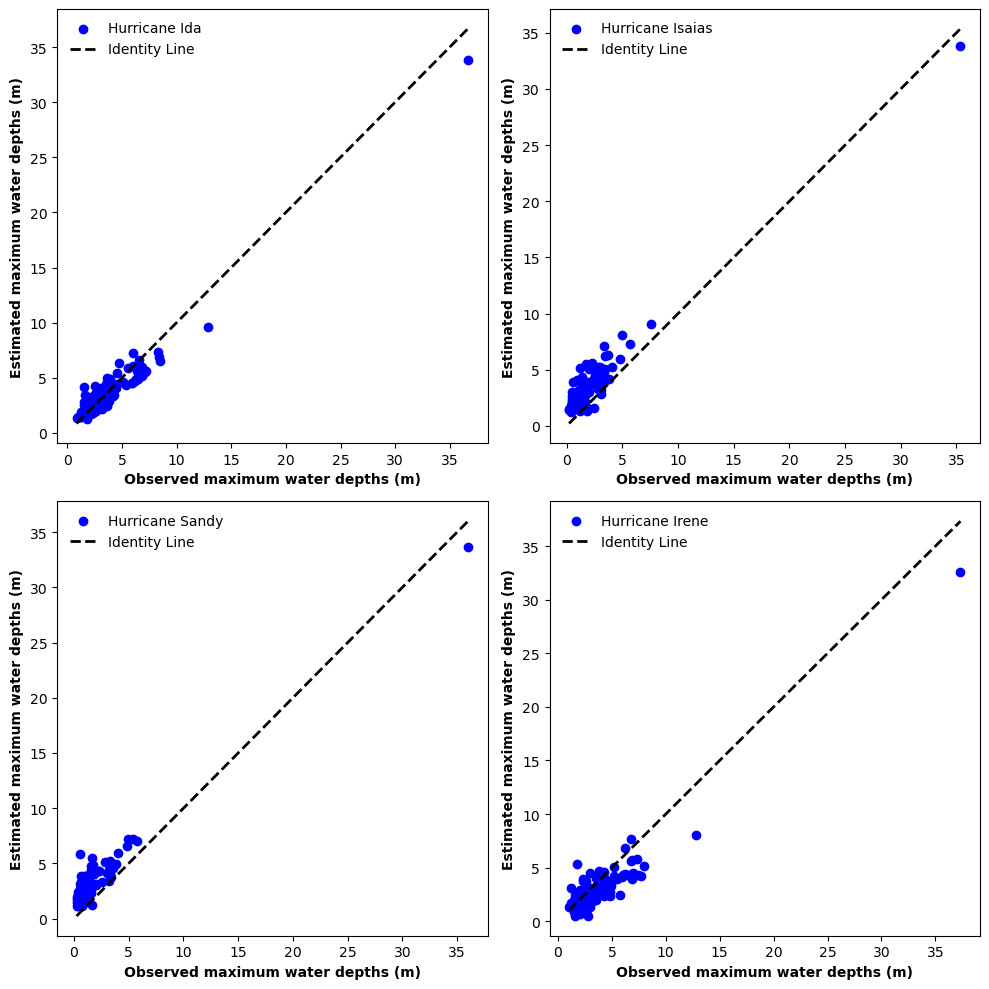

In [15]:
# Create a figure with two subplots side by side
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

# Ida
axes[0, 0].scatter(y_Ida, y_Ida_pred, color='blue', label='Hurricane Ida')
axes[0, 0].plot([y_Ida.min(), y_Ida.max()], [y_Ida.min(), y_Ida.max()], 'k--', lw=2, label='Identity Line')
axes[0, 0].set_xlabel('Observed maximum water depths (m)', fontweight='bold')
axes[0, 0].set_ylabel('Estimated maximum water depths (m)', fontweight='bold')
# axes[0, 0].set_title('Hurricane Ida')
axes[0, 0].legend(frameon=False) 

# Isaias
axes[0, 1].scatter(y_Isaias, y_Isaias_pred, color='blue', label='Hurricane Isaias')
axes[0, 1].plot([y_Isaias.min(), y_Isaias.max()], [y_Isaias.min(), y_Isaias.max()], 'k--', lw=2, label='Identity Line')
axes[0, 1].set_xlabel('Observed maximum water depths (m)', fontweight='bold')
axes[0, 1].set_ylabel('Estimated maximum water depths (m)', fontweight='bold')
#axes[0, 1].set_title('Hurricane Isaias')
axes[0, 1].legend(frameon=False) 

# Sandy
axes[1, 0].scatter(y_Sandy, y_Sandy_pred, color='blue', label='Hurricane Sandy')
axes[1, 0].plot([y_Sandy.min(), y_Sandy.max()], [y_Sandy.min(), y_Sandy.max()], 'k--', lw=2, label='Identity Line')
axes[1, 0].set_xlabel('Observed maximum water depths (m)', fontweight='bold')
axes[1, 0].set_ylabel('Estimated maximum water depths (m)', fontweight='bold')
#axes[1, 0].set_title('Hurricane Sandy')
axes[1, 0].legend(frameon=False) 

# Irene
axes[1, 1].scatter(y_Irene, y_Irene_pred, color='blue', label='Hurricane Irene')
axes[1, 1].plot([y_Irene.min(), y_Irene.max()], [y_Irene.min(), y_Irene.max()], 'k--', lw=2, label='Identity Line')
axes[1, 1].set_xlabel('Observed maximum water depths (m)', fontweight='bold')
axes[1, 1].set_ylabel('Estimated maximum water depths (m)', fontweight='bold')
#axes[1, 1].set_title('Hurricane Irene')
axes[1, 1].legend(frameon=False) 

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()